In [88]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import confusion_matrix

%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [60]:
output_path = "/Users/efiathieniti/Documents/Dropbox/UVA/Data Mining/Assignments/Assignment2/"


In [2]:
data = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [186]:
df = data.head(5000)


#  Feature Engineering

1. Extract season: autumn, summer, winter 


In [187]:
df['date_time']= pd.to_datetime(df['date_time'])
#data.date_time.map(lambda x: x.month)

df['season'] = df.date_time.apply(lambda dt: (dt.month%12 + 3)//3)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [188]:
# Drop columns with all zeros - only temporary
df = df.dropna(how="all", axis = 1)
df = df.loc[:, (df != 0).any(axis=0)]


In [189]:
# Subselect columns - include booking_book
summary_metrics = pd.DataFrame(df.describe())
summary_metrics.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'

In [190]:
df=df[list(summary_metrics.columns)]

In [191]:
for col in df.columns:
    print(df[col].dtype)


int64
int64
int64
float64
float64
int64
int64
int64
float64
int64
float64
float64
float64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
float64
int64
int64


In [192]:
summary_metrics

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
count,5000.0000,5000.000000,5000.000000,328.000000,328.000000,5000.000000,5000.000000,5000.000000,4992.000000,5000.000000,...,310.000000,376.000000,140.000000,1982.000000,2060.000000,623.000000,5000.000000,136.000000,5000.000000,5000.000000
mean,175.6626,10.055800,177.633800,3.208384,179.015854,174.413800,70258.955400,3.079000,3.756510,0.633400,...,0.174194,0.119681,22.614286,-0.076186,0.008252,14.051364,0.045000,429.725882,0.027200,1.930200
std,102.7139,7.798208,65.090219,0.667490,62.477158,68.192195,40369.113419,1.069854,1.039713,0.481924,...,0.587335,0.348767,49.315252,0.475283,0.214641,12.496968,0.207325,583.879615,0.162682,0.917331
min,1.0000,5.000000,4.000000,2.300000,74.790000,13.000000,18.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,47.100000,0.000000,1.000000
25%,90.0000,5.000000,100.000000,2.500000,122.510000,100.000000,36035.750000,3.000000,3.500000,0.000000,...,0.000000,0.000000,7.750000,0.000000,0.000000,7.000000,0.000000,128.082500,0.000000,1.000000
50%,162.0000,5.000000,219.000000,3.260000,180.750000,219.000000,69892.500000,3.000000,4.000000,1.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000,208.120000,0.000000,2.000000
75%,265.0000,14.000000,219.000000,3.740000,229.180000,219.000000,104517.000000,4.000000,4.500000,1.000000,...,1.000000,0.000000,24.000000,0.000000,0.000000,17.000000,0.000000,496.932500,0.000000,2.000000
max,365.0000,32.000000,220.000000,5.000000,334.430000,221.000000,140812.000000,5.000000,5.000000,1.000000,...,1.000000,1.000000,527.000000,1.000000,1.000000,153.000000,1.000000,4491.280000,1.000000,4.000000


In [193]:
df.dtypes


srch_id                          int64
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance      float64
random_bool              

### Calculate correlation and mutual information/information gain

KeyError: 'booking_bool'

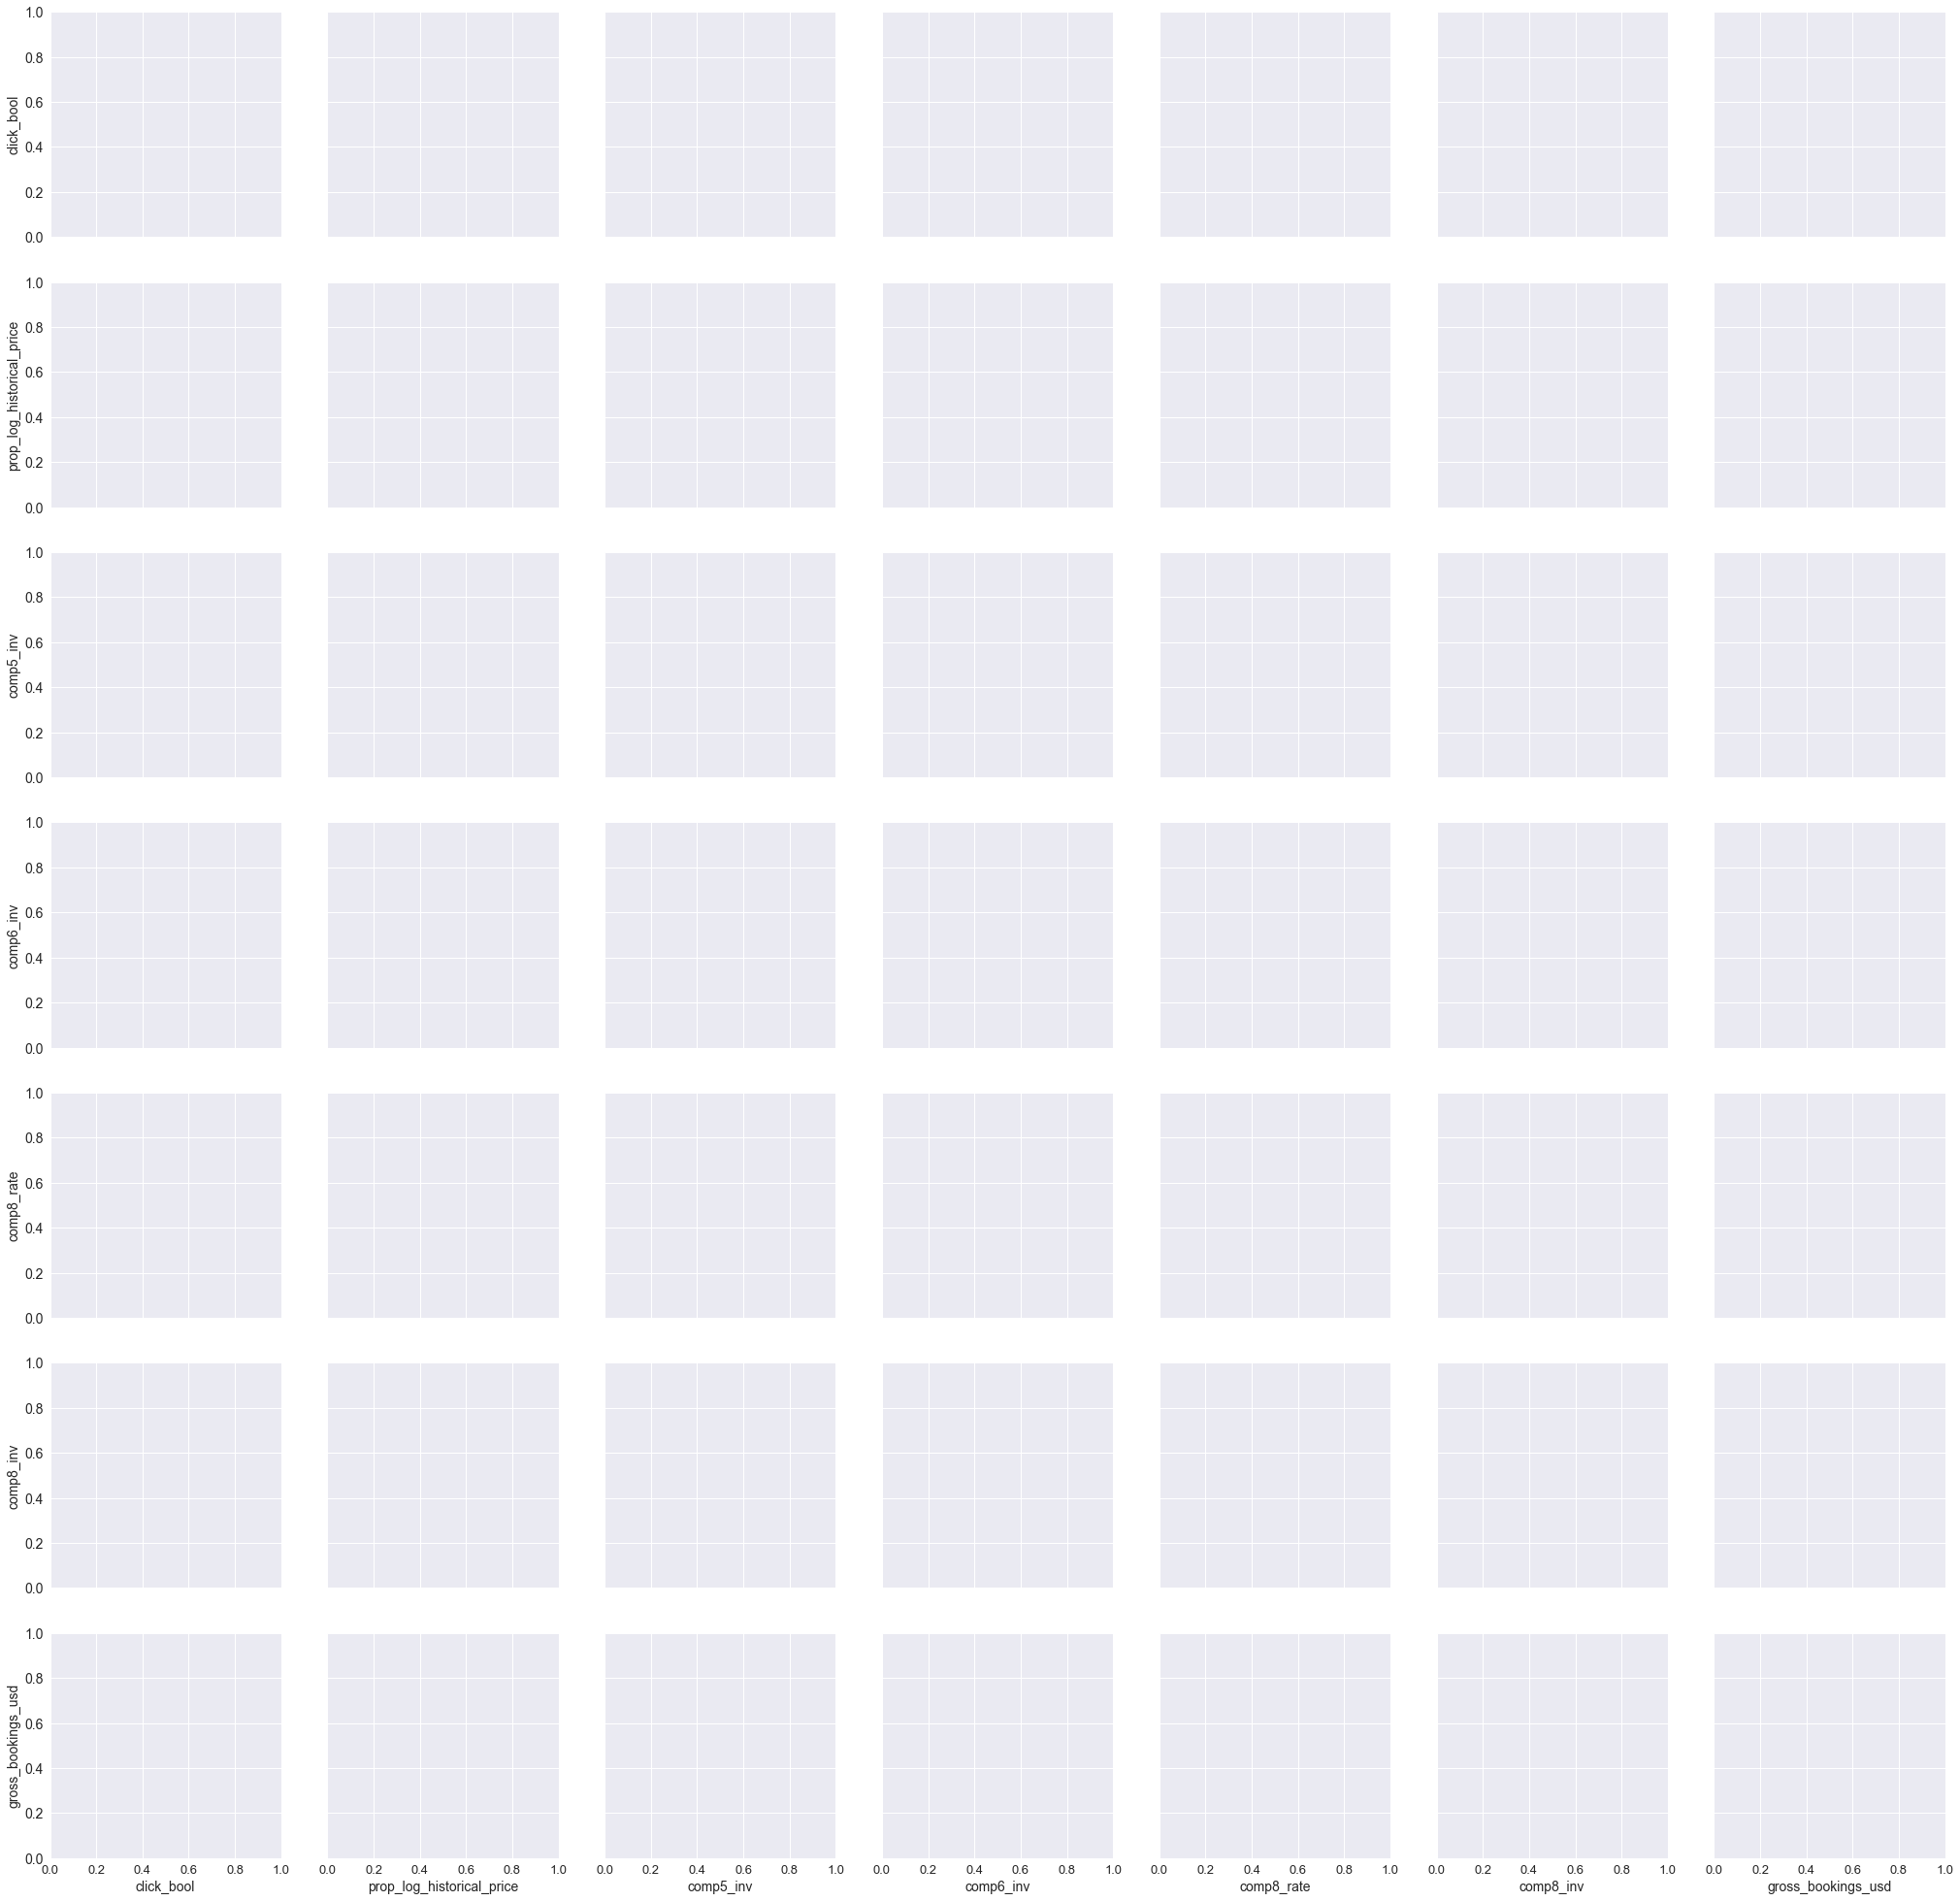

In [196]:
columns_to_plot=[50,12,39,42,47,48,51]
g = sns.pairplot( df.iloc[1:500,columns_to_plot], hue="booking_bool",palette = 'seismic',size=5,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10),  )



## Composite features
Rank by group


In [197]:
# price rank or normalize?
df['price_rank'] = df.groupby(['srch_id'])['price_usd'].rank(method='dense').astype(int)
df['star_rank'] = df.groupby(['srch_id'])['price_usd'].rank(method='dense').astype(int)


Normalize within srch_id: price, sta

In [198]:

df['price_usd_normalized'] = df[['price_usd','srch_id']].groupby('srch_id').transform(lambda x: (x - x.min()) / (x.max()-x.min()))


Value for money

In [199]:
df['value_for_money']=df.price_usd/df.prop_review_score


In [200]:

df['value_for_money'] = df.prop_review_score/df.price_usd

In [201]:
selected_features = ['value_for_money','price_usd_normalized', 'star_rank']
features_to_keep = ['booking_bool']
all_possible_features = selected_features+features_to_keep
df_to_train = df.ix[:,all_possible_features]

## Missing values

In [202]:
for feature in all_possible_features:
    print(feature)
    df_to_train[feature][df_to_train[feature].isnull()] = df_to_train[feature].median()
    print(df_to_train[feature].isnull())

value_for_money
0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4970    False
4971    False
4972    False
4973    False
4974    False
4975    False
4976    False
4977    False
4978    False
4979    False
4980    False
4981    False
4982    False
4983    False
4984    False
4985    False
4986    False
4987    False
4988    False
4989    False
4990    False
4991    False
4992    False
4993    False
4994    False
4995    False
4996    False
4997    False
4998    False
4999    False
Name: value_for_money, dtype: bool
price_usd_normalized


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4970    False
4971    False
4972    False
4973    False
4974    False
4975    False
4976    False
4977    False
4978    False
4979    False
4980    False
4981    False
4982    False
4983    False
4984    False
4985    False
4986    False
4987    False
4988    False
4989    False
4990    False
4991    False
4992    False
4993    False
4994    False
4995    False
4996    False
4997    False
4998    False
4999    False
Name: price_usd_normalized, dtype: bool
star_rank
0       False
1       False
2       False
3       False
4       False
5       False
6       Fals

# Build Model and classifier

In [203]:
## Finalise the dataset
final_df=df_to_train

# Choose setting 
mode = 'Full' # 'Full' or 'partial'
model_to_plot=0 # 0 or 1
mode = 'partial'

# For SVM use Age continuous as it can learn nonlinear relationships
#selected_features =["Pclass", "Sex", "Age*Class", "Fare_Per_Person", "hasCabin", 
#                    "Title","Survived",
#                   "Family_Size", "Embarked", "Age"]

select = ['booking_bool']
auc = []

models_names = [ 'LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier' ]
metric = 'roc_auc'
cv=4
models = [ LogisticRegression,  RandomForestClassifier , SVC]


In [ ]:

model_to_plot = 1
class_predict = "booking_bool"
all_possible_features = selected_features       
for feature in all_possible_features:
    select.append(feature)
    print(select)
    full_set = final_df[select]

    # First split the data into train and test

    # Extract the train and test from the new data_frame
    cols = list(set(full_set.columns) - set([class_predict]))
    X_train = full_set[:][cols]
    y_train = full_set[:][class_predict]
    
        # Running some models, testing with small cross_validation and f1 metric (binary target) and running the prediction
    # with all the training set
    
    mscores = []
    lscores = ['f1','accuracy','recall','roc_auc']
    np.random.seed(42) # Reproducibility of results is very important!
    for elem in models:
        mscores2 = []
        model = elem()
        for sc in lscores:
            scores = cross_val_score(model, X_train, y_train, scoring=sc, cv=cv)
            #y_pred = cross_val_predict(model, X_train, y_train, scoring=sc, cv=cv)
            #conf_mat = confusion_matrix(y_train,y_pred)
            
            mscores2.append(np.mean(scores))
            mscores.append(mscores2)
       # model_predict(model, X_train, y_train, mode)       
    scores = pd.DataFrame(mscores, columns=lscores)
    print(scores.ix[model_to_plot,metric])
    auc.append(scores.ix[model_to_plot,metric])

plt.plot(auc)
plt.ylabel(metric)
plt.title(models_names[model_to_plot])
plt.xticks(np.arange(len(all_possible_features)), all_possible_features,  rotation=45)
plt.savefig(output_path + "auc_by_feature_%s_%s_cv%s.png"%(models_names[model_to_plot], mode, cv), format='png')
plt.tight_layout()  
plt.show()
    